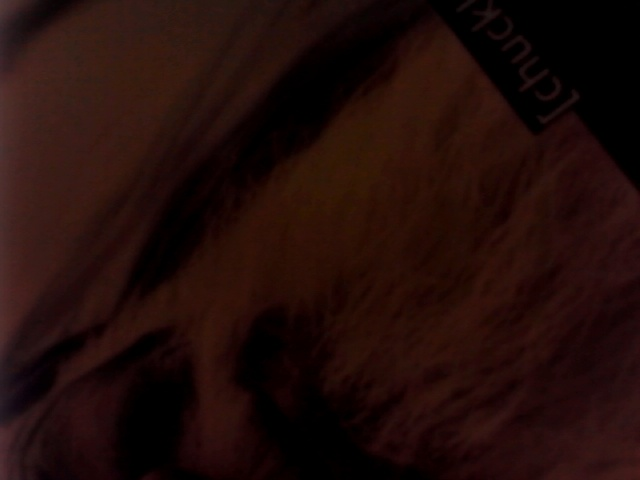

In [4]:
import cv2
import numpy as np
from IPython.display import display, Image

# Function to convert image to JPEG format in memory and then display it
def array_to_image(a, format='jpeg'):
    # Convert the image to RGB (OpenCV uses BGR)
    is_success, im_buf_arr = cv2.imencode(".jpg", cv2.cvtColor(a, cv2.COLOR_BGR2RGB))
    if is_success:
        return Image(data=im_buf_arr.tobytes(), format=format)
    else:
        raise Exception("Image encoding error")

# Capture from the default camera
cap = cv2.VideoCapture(0)

# Read a frame
ret, frame = cap.read()
if not ret:
    print("Failed to grab frame")
else:
    # Display the image
    display(array_to_image(frame))

# Release the camera and close windows
cap.release()
cv2.destroyAllWindows()


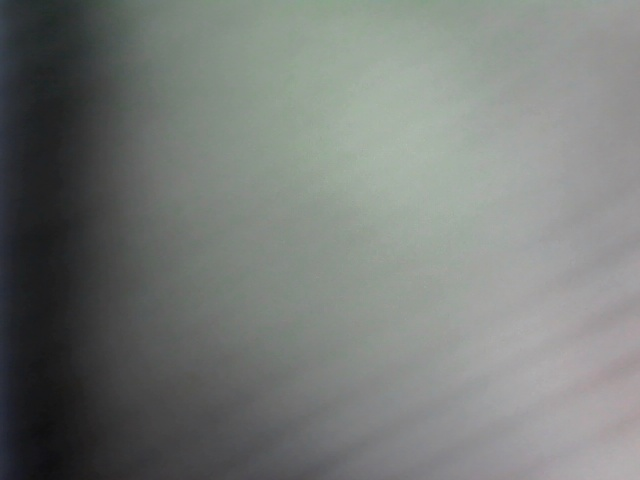

In [1]:
# Let's get some video action going!

import cv2
import numpy as np
from IPython.display import display, clear_output, Image
import time

# Function to convert an OpenCV image to a Jupyter Image display object
def array_to_image(a, format='jpeg'):
    # Convert the image to RGB
    is_success, im_buf_arr = cv2.imencode(".jpg", cv2.cvtColor(a, cv2.COLOR_BGR2RGB))
    if is_success:
        return Image(data=im_buf_arr.tobytes(), format=format)
    else:
        raise Exception("Image encoding error")

# Capture from the default camera
cap = cv2.VideoCapture(0)

# Create a display object
d = display(None, display_id=True)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Update the display with the new image
        d.update(array_to_image(frame))

        # Wait a bit before the next frame (adjust as needed)
        time.sleep(0.05)

except KeyboardInterrupt:
    pass

# Release the camera and close windows
cap.release()
cv2.destroyAllWindows()


In [1]:
import cv2
import time

# Setup
capture_interval = 10  # seconds
num_hours = 8
num_frames = int((num_hours * 3600) / capture_interval)

# Initialize camera
cap = cv2.VideoCapture(0)

# Capture loop
for _ in range(num_frames):
    ret, frame = cap.read()
    if not ret:
        break

    # Save frame as image
    timestamp = time.strftime("%Y%m%d-%H%M%S")
    filename = f"timelapse_{timestamp}.jpg"
    cv2.imwrite(filename, frame)

    # Wait for the next capture
    time.sleep(capture_interval)

# Release the camera
cap.release()


KeyboardInterrupt: 

In [1]:
import cv2
import time
import os

def capture_timelapse(output_folder, capture_interval, num_hours):
    # Check if the output folder exists
    if not os.path.exists(output_folder):
        create_folder = input(f"The folder '{output_folder}' does not exist. Do you want to create it? (yes/no): ")
        if create_folder.lower() == 'yes':
            os.makedirs(output_folder)
        else:
            print("Operation cancelled by user.")
            return

    # Calculate the total number of frames to capture
    num_frames = int((num_hours * 3600) / capture_interval)

    # Initialize camera
    cap = cv2.VideoCapture(0)

    try:
        for i in range(num_frames):
            ret, frame = cap.read()
            if not ret:
                print("Failed to capture frame.")
                break

            # Save frame as image
            timestamp = time.strftime("%Y%m%d-%H%M%S")
            filename = f"{output_folder}/timelapse_{timestamp}.jpg"
            cv2.imwrite(filename, frame)
            print(f"Captured frame {i + 1} of {num_frames}")

            # Wait for the next capture
            time.sleep(capture_interval)

    except KeyboardInterrupt:
        print("Timelapse capture interrupted by user.")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        cap.release()
        print("Camera released and program terminated.")

In [13]:
import cv2
import os
import glob

def create_timelapse_video(input_folder, output_folder, frame_rate):
    # Get all the jpg images from the folder
    img_array = []
    file_names = sorted(glob.glob(f'{input_folder}/*.jpg'))
    
    if not file_names:
        print("No images found in the folder.")
        return

    for filename in file_names:
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width, height)
        img_array.append(img)

    # Extract start and end time from filenames
    start_time = file_names[0].split('/')[-1].split('_')[1].split('.')[0]
    end_time = file_names[-1].split('/')[-1].split('_')[1].split('.')[0]

    # Define the output video file name
    output_video = f"{output_folder}/timelapse_{start_time}_to_{end_time}.mp4"

    # Define the codec and create VideoWriter object
    out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), frame_rate, size)

    for i in range(len(img_array)):
        out.write(img_array[i])
    out.release()

    print(f"Video created successfully: {output_video}")

# Parameters
input_folder = 'timelapse_images'  # Folder where your images are stored
output_folder = 'timelapse_videos'  # Folder where your video will be saved
frame_rate = 30  # Frame rate of the output video

# Check if the output folder exists, if not, create it
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create the timelapse video
create_timelapse_video(input_folder, output_folder, frame_rate)


Video created successfully: timelapse_videos/timelapse_images\timelapse_to_images\timelapse.mp4


In [12]:
# Parameters
input_folder = 'timelapse_images'  # Folder where your images are stored
output_folder = 'timelapse_videos'  # Folder where your video will be saved
frame_rate = 30  # Frame rate of the output video

# Check if the output folder exists, if not, create it
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create the timelapse video
create_timelapse_video(input_folder, output_folder, frame_rate)

Video created successfully: timelapse_videos/timelapse_images\timelapse_to_images\timelapse.mp4


In [14]:
# Parameters
output_folder = "timelapse_images"
capture_interval = 30  # in seconds
num_hours = 1.5

# Example usage
capture_timelapse(output_folder, capture_interval, num_hours)


Captured frame 1 of 180
Captured frame 2 of 180
Captured frame 3 of 180
Captured frame 4 of 180
Captured frame 5 of 180
Captured frame 6 of 180
Captured frame 7 of 180
Captured frame 8 of 180
Captured frame 9 of 180
Captured frame 10 of 180
Captured frame 11 of 180
Captured frame 12 of 180
Captured frame 13 of 180
Captured frame 14 of 180
Captured frame 15 of 180
Captured frame 16 of 180
Captured frame 17 of 180
Captured frame 18 of 180
Captured frame 19 of 180
Captured frame 20 of 180
Captured frame 21 of 180
Captured frame 22 of 180
Captured frame 23 of 180
Captured frame 24 of 180
Captured frame 25 of 180
Captured frame 26 of 180
Captured frame 27 of 180
Captured frame 28 of 180
Captured frame 29 of 180
Captured frame 30 of 180
Captured frame 31 of 180
Captured frame 32 of 180
Captured frame 33 of 180
Captured frame 34 of 180
Captured frame 35 of 180
Captured frame 36 of 180
Captured frame 37 of 180
Captured frame 38 of 180
Captured frame 39 of 180
Captured frame 40 of 180
Captured 

In [4]:
import cv2
import os
import glob

def create_timelapse_video(input_folder, output_video, frame_rate):
    # Get all the jpg images from the folder
    img_array = []
    for filename in sorted(glob.glob(f'{input_folder}/*.jpg')):
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width, height)
        img_array.append(img)

    # Define the codec and create VideoWriter object
    out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), frame_rate, size)

    for i in range(len(img_array)):
        out.write(img_array[i])
    out.release()

    print(f"Video created successfully: {output_video}")




In [15]:
# Parameters
input_folder = 'timelapse_images'  # Folder where your images are stored
output_video = 'timelapse_images/timelapse_video2.mp4'  # Output video file
frame_rate = 24  # Frame rate of the output video

# Create the timelapse video
create_timelapse_video(input_folder, output_video, frame_rate)

Video created successfully: timelapse_images/timelapse_video2.mp4/timelapse_images\timelapse_to_images\timelapse.mp4


In [4]:
# # !pip install ipywidgets

# !pip install opencv-python

In [3]:
import cv2
import time
import threading
from IPython.display import display
import ipywidgets as widgets

class TimelapseCamera:
    def __init__(self, output_folder, capture_interval=60, num_hours=8):
        self.output_folder = output_folder
        self.capture_interval = capture_interval
        self.num_frames = int((num_hours * 3600) / capture_interval)
        self.running = False
        self.thread = None

    def start_capture(self):
        if not self.running:
            self.running = True
            self.thread = threading.Thread(target=self._capture)
            self.thread.start()

    def stop_capture(self):
        self.running = False
        if self.thread:
            self.thread.join()

    def _capture(self):
        cap = cv2.VideoCapture(0)
        try:
            for _ in range(self.num_frames):
                if not self.running:
                    break
                ret, frame = cap.read()
                if not ret:
                    break

                timestamp = time.strftime("%Y%m%d-%H%M%S")
                filename = f"{self.output_folder}/timelapse_{timestamp}.jpg"
                cv2.imwrite(filename, frame)
                time.sleep(self.capture_interval)
        finally:
            cap.release()

# Create Timelapse Camera object
timelapse_cam = TimelapseCamera(output_folder="timelapse_images", capture_interval=60, num_hours=8)

# Create start and stop buttons
start_button = widgets.Button(description="Start Capture")
stop_button = widgets.Button(description="Stop Capture")

# Define button click actions
def start_button_clicked(b):
    timelapse_cam.start_capture()

def stop_button_clicked(b):
    timelapse_cam.stop_capture()

start_button.on_click(start_button_clicked)
stop_button.on_click(stop_button_clicked)

# Display buttons
display(start_button, stop_button)


Button(description='Start Capture', style=ButtonStyle())

Button(description='Stop Capture', style=ButtonStyle())

In [1]:
## Here's a script to capture .mp4 video:
import cv2
import time


def capture_video(output_file, capture_duration=3600, fps=30):
    # Initialize camera
    cap = cv2.VideoCapture(0)

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec used for MP4 files
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    out = cv2.VideoWriter(output_file, fourcc, fps, (frame_width, frame_height))

    start_time = cv2.getTickCount()
    while int((cv2.getTickCount() - start_time) / cv2.getTickFrequency()) < capture_duration:
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture frame. Exiting.")
            break

        # Write the frame to the video file
        out.write(frame)

    # Release everything when the job is finished
    cap.release()
    out.release()
    cv2.destroyAllWindows()




In [2]:
# Capture A vieo example
capture_duration_min = 2
capture_dureation_seconds= capture_duration_min*60
timestamp = time.strftime("%Y%m%d-%H%M%S")
output_video_filename = f"fish_video_{timestamp}.mp4"
capture_video(output_video_filename, capture_duration=capture_dureation_seconds, fps=30)

In [10]:
## A capture with an optional countdown:

import cv2
import time

def capture_video(output_file, capture_duration=3600, fps=30, start_delay=5):
    # Delay before starting the capture
    print(f"Starting in {start_delay} seconds...")
    time.sleep(start_delay)

    # Initialize camera
    cap = cv2.VideoCapture(0)

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec used for MP4 files
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    out = cv2.VideoWriter(output_file, fourcc, fps, (frame_width, frame_height))

    start_time = cv2.getTickCount()
    while int((cv2.getTickCount() - start_time) / cv2.getTickFrequency()) < capture_duration:
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture frame. Exiting.")
            break

        # Write the frame to the video file
        out.write(frame)

    # Release everything when the job is finished
    cap.release()
    out.release()
    cv2.destroyAllWindows()



In [18]:
# Example usage
capture_duration_min = 1
capture_dureation_seconds = capture_duration_min * 60
timestamp = time.strftime("%Y%m%d-%H%M%S")
output_video_filename = f"fish_video_{timestamp}.mp4"
capture_video(output_video_filename, capture_duration=capture_dureation_seconds, fps=30)


Starting in 5 seconds...


In [3]:
## Now let's process the video
import cv2
import numpy as np

def process_video(input_video, output_video, sensitivity=30):
    # Open the video
    cap = cv2.VideoCapture(input_video)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video, fourcc, 20.0, (640, 480))

    # Read the first frame
    ret, frame1 = cap.read()
    ret, frame2 = cap.read()

    while cap.isOpened():
        # Find the absolute difference between frames
        diff = cv2.absdiff(frame1, frame2)
        gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        _, thresh = cv2.threshold(blur, sensitivity, 255, cv2.THRESH_BINARY)
        dilated = cv2.dilate(thresh, None, iterations=3)
        contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # Draw rectangles around detected motion
        for contour in contours:
            if cv2.contourArea(contour) < 1000:  # Adjust this threshold based on the size of movements
                continue
            (x, y, w, h) = cv2.boundingRect(contour)
            cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Write the frame with highlighted movement
        out.write(frame1)

        # Read next frame
        frame1 = frame2
        ret, frame2 = cap.read()

        if not ret:
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()

In [14]:
# Example usage
process_video('output_video_20240215-213040.mp4', 'processed_output_video_s100_20240215-213040.mp4', sensitivity=100)

In [15]:
# c:\Users\dzbon\OneDrive\Documents\GitHub\FishCam\fish_video_20240215-221504.mp4
process_video('fish_video_20240215-221504.mp4', 'processed_fish_video__s10020240215-221504.mp4', sensitivity=100)

In [16]:
## Process video and add fading purple box to the motion
import cv2
import numpy as np

def process_video_with_motion_history(input_video, output_video, sensitivity=30, fade_strength=0.85):
    # Open the video
    cap = cv2.VideoCapture(input_video)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video, fourcc, 20.0, (640, 480))

    # Read the first frame
    ret, frame1 = cap.read()
    ret, frame2 = cap.read()

    # Initialize the motion history image
    motion_history = np.zeros_like(frame1, dtype=np.float32)

    while cap.isOpened():
        # Find the absolute difference between frames
        diff = cv2.absdiff(frame1, frame2)
        gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        _, thresh = cv2.threshold(blur, sensitivity, 255, cv2.THRESH_BINARY)
        dilated = cv2.dilate(thresh, None, iterations=3)
        contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # Process each contour found
        for contour in contours:
            if cv2.contourArea(contour) < 1000:  # Adjust the threshold based on the size of movements
                continue
            (x, y, w, h) = cv2.boundingRect(contour)

            # Draw green rectangle for current motion
            cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Update motion history with purple rectangle
            cv2.rectangle(motion_history, (x, y), (x + w, y + h), (255, 0, 255), -1)

        # Fade the motion history image
        motion_history *= fade_strength

        # Add motion history to the current frame
        frame_with_history = cv2.add(frame1.astype(np.float32), motion_history)

        # Write the frame to the video file
        out.write(frame_with_history.astype(np.uint8))

        # Read next frame
        frame1 = frame2
        ret, frame2 = cap.read()

        if not ret:
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()


In [17]:

# Example usage
# process_video_with_motion_history('fish_video_20240215-215850.mp4', 'history_fish_video_20240215-215850.mp4', sensitivity=30)
# c:\Users\dzbon\OneDrive\Documents\GitHub\FishCam\fish_video_20240215-221504.mp4

process_video_with_motion_history('fish_video_20240215-221504.mp4', 'history_fish_video_20240215-221504.mp4', sensitivity=10)
